# Iris flowers classification
In this tutorial we are going to work through a small machine learning project end-to-end. Here is an overview of what we are going to cover:
1. Loading the dataset.
2. Summarizing the dataset.
3. Visualizing the dataset.
4. Evaluating some algorithms.
5. Making some predictions.

In [37]:
import warnings
warnings.filterwarnings("ignore")
#Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 1. Load the dataset
The iris dataset can be downloaded from the UCI Machine Learning repository.

In [6]:
#Load dataset
filename = 'iris.data'
names = ['sepal-length',  'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(filename, names=names)
dataset

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 2. Summarize the dataset
Now it is time to take a look at the data. In this step we are going to take a look at the data a few diﬀerent ways:
- Dimensions of the dataset.
- Peek at the data itself.
- Statistical summary of all attributes.
- Breakdown of the data by the class variable.

In [7]:
#Dimension of the dataset
dataset.shape

(150, 5)

In [8]:
#Peak of the data
dataset.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
#Statistical summary
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
#class distribution
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## 3. Data visualization
We now have a basic idea about the data. We need to extend this with some visualizations. We are going to look at two types of plots:
- Univariate plots to better understand each attribute.
- Multivariate plots to better understand the relationships between attributes.

### 3.1. Univariate plots

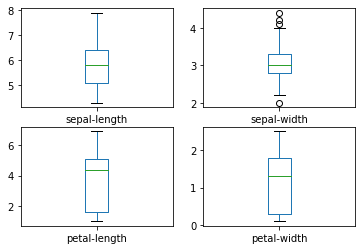

In [13]:
#box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

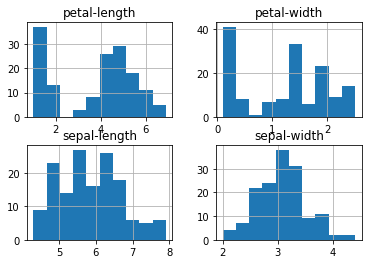

In [14]:
#histograms
dataset.hist()
pyplot.show()

### 3.2. Multivariate plots

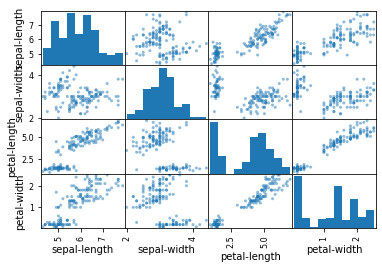

In [16]:
#scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

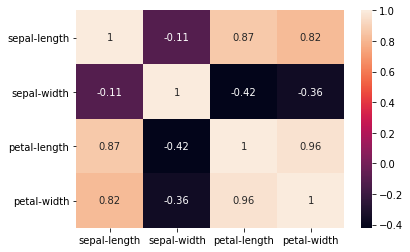

In [22]:
seaborn.heatmap(dataset.corr(), annot=True)
pyplot.show()

## 4. Evaluate some algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data. Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross-validation.
3. Build 5 diﬀerent models to predict species from ﬂower measurements
4. Select the best model.

### 4.1. Create a validation dataset

In [23]:
#split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.2
seed = 38
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=validation_size, random_state=seed)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((120, 4), (120,), (30, 4), (30,))

### 4.2. Test harness
We will use 10-fold cross-validation to estimate accuracy. This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits. We are using the metric of accuracy to evaluate models. This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

### 4.3. Build models
We don’t know which algorithms would be good on this problem or what conﬁgurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results. Let’s evaluate six diﬀerent algorithms:
- Logistic Regression (LR).
- Linear Discriminant Analysis (LDA).
- k-Nearest Neighbors (KNN).
- Classiﬁcation and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).
This list is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable. Let’s build and evaluate our ﬁve models:

In [38]:
#Spot-Check algorithms
models = dict()
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()
#evaluate each model in turn
results = []
names = []
for name, model in models.items() :
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.958333 (+-0.041667)
LDA: 0.966667 (+-0.055277)
KNN: 0.966667 (+-0.040825)
CART: 0.941667 (+-0.065085)
NB: 0.941667 (+-0.053359)
SVM: 0.950000 (+-0.055277)


We can see that it looks like KNN has the largest estimated accuracy score. We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross-validation).

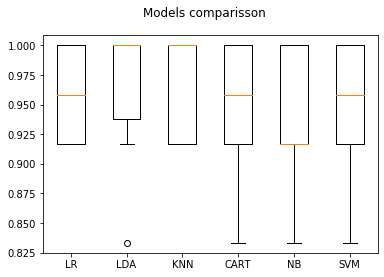

In [39]:
#compare models
fig = pyplot.figure()
fig.suptitle('Models comparisson')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 4.4. Make predictions
The KNN algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our validation dataset. This will give us an independent ﬁnal check on the accuracy of the best model. It is important to keep a validation set just in case you made a slip during training, such as overﬁtting to the training set or a data leak. Both will result in an overly optimistic result. We can run the KNN model directly on the validation set and summarize the results as a ﬁnal accuracy score, a confusion matrix and a classiﬁcation report.

In [42]:
#Make predictions on the validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_val)
print(accuracy_score(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))

0.9666666666666667
[[ 9  0  0]
 [ 0  9  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



Text(0.5, 1, 'Confusion matrix')

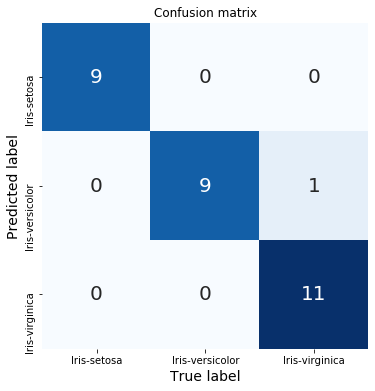

In [48]:
#plot the confusion matrix
pyplot.figure(figsize = (8,6))
seaborn.heatmap(confusion_matrix(Y_val, predictions), square=True, annot=True, annot_kws={"size": 20},
                cmap=pyplot.cm.Blues, cbar=False, xticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'],
                yticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
pyplot.xlabel('True label', fontsize=14)
pyplot.ylabel('Predicted label', fontsize=14)
pyplot.title('Confusion matrix')